In [1]:
import pandas as pd
import sklearn.metrics as m
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import  train_test_split

In [ ]:
Dataset = pd.read_csv('Dataset-Cured.csv', delimiter= ";")
Dataset

,gender,age,eritrosit,hematokrit,hemoglobin,hermch,khermchc,leukosit,trombosit,cured
0,0,62,"3,14","27,9","9,3","29,6","33,3",14630,291,1
1,1,48,305,257,85,279,331,25400,200,1
2,0,68,310,249,86,277,345,24690,177,1
3,0,62,"4,74","38,3","12,6","26,6","32,9",10700,263,1
4,1,58,297,268,92,310,343,10370,217,0
...,...,...,...,...,...,...,...,...,...,...
4686,1,60,"3,85","33,7","11,2","29,1","33,2",10200,314,1
4687,1,56,"4,53","39,5","13,6",30,"34,4",16270,341,1
4688,1,58,"6,07","38,7","11,8","19,4","30,5",10670,224,1
4689,1,42,"4,44","35,3",12,27,34,7940,202,1


In [2]:
# run this line if you are using google colab for cloud data mining

url = 'https://drive.google.com/file/d/1EdQEI6XKwzGBJMgpkx4Vq1Vmipgp3Vzd/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

Dataset = pd.read_csv(path, delimiter = ';')
Dataset

,gender,age,eritrosit,hematokrit,hemoglobin,hermch,khermchc,leukosit,trombosit,cured
0,0,62,"3,14","27,9","9,3","29,6","33,3",14630,291,1
1,1,48,305,257,85,279,331,25400,200,1
2,0,68,310,249,86,277,345,24690,177,1
3,0,62,"4,74","38,3","12,6","26,6","32,9",10700,263,1
4,1,58,297,268,92,310,343,10370,217,0
...,...,...,...,...,...,...,...,...,...,...
4686,1,60,"3,85","33,7","11,2","29,1","33,2",10200,314,1
4687,1,56,"4,53","39,5","13,6",30,"34,4",16270,341,1
4688,1,58,"6,07","38,7","11,8","19,4","30,5",10670,224,1
4689,1,42,"4,44","35,3",12,27,34,7940,202,1


In [3]:
Dataset= Dataset.replace(',','.',regex = True)
Dataset

,gender,age,eritrosit,hematokrit,hemoglobin,hermch,khermchc,leukosit,trombosit,cured
0,0,62,3.14,27.9,9.3,29.6,33.3,14630,291,1
1,1,48,305,257,85,279,331,25400,200,1
2,0,68,310,249,86,277,345,24690,177,1
3,0,62,4.74,38.3,12.6,26.6,32.9,10700,263,1
4,1,58,297,268,92,310,343,10370,217,0
...,...,...,...,...,...,...,...,...,...,...
4686,1,60,3.85,33.7,11.2,29.1,33.2,10200,314,1
4687,1,56,4.53,39.5,13.6,30,34.4,16270,341,1
4688,1,58,6.07,38.7,11.8,19.4,30.5,10670,224,1
4689,1,42,4.44,35.3,12,27,34,7940,202,1


In [4]:
x = Dataset.drop('cured', axis= 1)
y = Dataset.cured

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.5)
tp = y_train[y_train == 1].count()
tn = y_train[y_train == 0].count()
print('count y_train row: ', y_train.count())
print('truth Positive: {}'.format(tp))
print('truth Negative: {}'.format(tn))

count y_train row:  2345
truth Positive: 2120
truth Negative: 225


In [11]:
Weight = {0: tn, 1: tp};
svc = SVC(kernel="linear", probability= True, class_weight = Weight)

In [12]:
svc.fit(x_train, y_train)

SVC(class_weight={0: 225, 1: 2120}, kernel='linear', probability=True)

In [ ]:
prediction = svc.predict(x_train)

print("Confusion matrix for train set")
print(m.confusion_matrix(y_train, prediction))
print("Accuracy",m.accuracy_score(y_train,prediction))
print("precision = ", m.precision_score(y_train, prediction, average="weighted"))
print("F Measure",m.f1_score(y_train,prediction))
print("Recall",m.recall_score(y_train,prediction), "\n")

predictions = svc.predict(x_test)
print("Confusion matrix for test set")
print(m.confusion_matrix(y_test, predictions))
print("Accuracy",m.accuracy_score(y_test,predictions))
print("Precision",m.precision_score(y_test,predictions, average='weighted'))
print("F Measure",m.f1_score(y_test,predictions))
print("Recall",m.recall_score(y_test,predictions))

Confusion matrix for train set
[[   3  247]
 [   6 2089]]
Accuracy 0.8921108742004265
precision =  0.8344630200270662
F Measure 0.9429022793951704
Recall 0.9971360381861575 

Confusion matrix for test set
[[   0  222]
 [   7 2117]]
Accuracy 0.902387041773231
Precision 0.8194399643977524
F Measure 0.9486892224960788
Recall 0.9967043314500942


Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       247
           1       0.89      1.00      0.94      2099

    accuracy                           0.89      2346
   macro avg       0.45      0.50      0.47      2346
weighted avg       0.80      0.89      0.84      2346



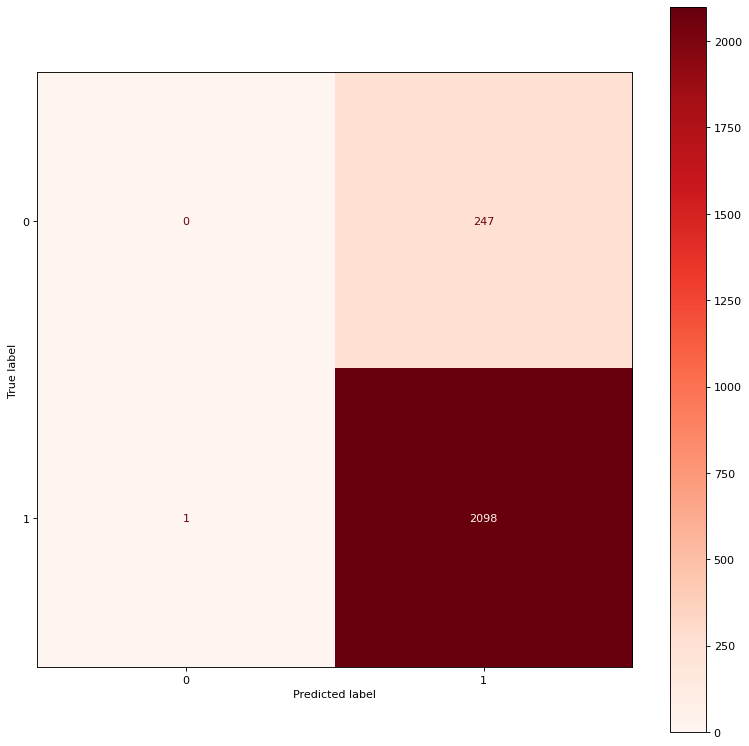

In [16]:
# Classification Report matrix for miss Medi
predictions = svc.predict(x_test)

print('Classification Report')
cr = m.classification_report(y_test, predictions)
print(cr)

# ploting confussion matrix
fig, ax = plt.subplots(ncols= 1, nrows=1, figsize = (12,12), dpi = 80)
cm = m.confusion_matrix(y_test, predictions)
m.ConfusionMatrixDisplay(cm).plot(ax = ax, cmap = 'Reds')

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


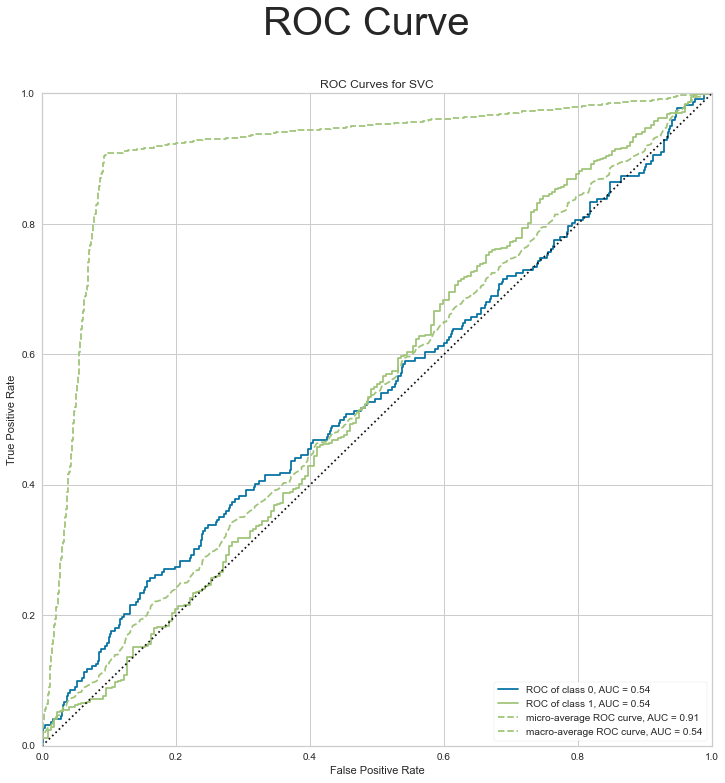

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc

fig, ax = plt.subplots(nrows = 1,ncols = 1,figsize = (12,12));
fig.suptitle('ROC Curve', fontsize = 40)
curve = roc_auc(svc, x_train, y_train, X_test = x_test, y_test = y_test, classes=[0,1], ax = ax)
fig.savefig('svc-cured-ROC-AUC.pdf')

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)